In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# Set a style for our plots
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
# Define the path to the training data
# Note: The '...' part of the path will depend on the dataset's folder name in Kaggle
DATA_DIR = '/kaggle/input/training/train'

# Get the list of class names (which are the folder names)
class_names = sorted(os.listdir(DATA_DIR))
num_classes = len(class_names)

print(f"Found {num_classes} classes.")
print("Class names:", class_names)

Found 10 classes.
Class names: ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia']


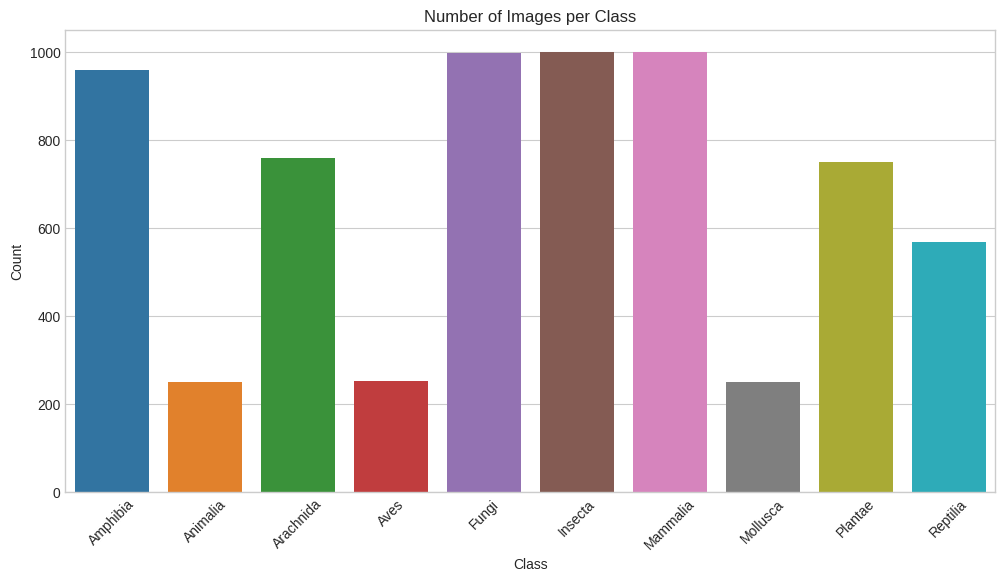

       Class  Count
0   Amphibia    959
1   Animalia    250
2  Arachnida    759
3       Aves    252
4      Fungi    999
5    Insecta   1000
6   Mammalia   1000
7   Mollusca    250
8    Plantae    750
9   Reptilia    568


In [4]:
# Count the number of images in each class
image_counts = {}
for class_name in class_names:
    class_path = os.path.join(DATA_DIR, class_name)
    image_counts[class_name] = len(os.listdir(class_path))

# Convert to a pandas DataFrame for easy plotting
df_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Count'])

# Plot the class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Count', data=df_counts)
plt.title('Number of Images per Class')
plt.xticks(rotation=45)
plt.show()

print(df_counts)

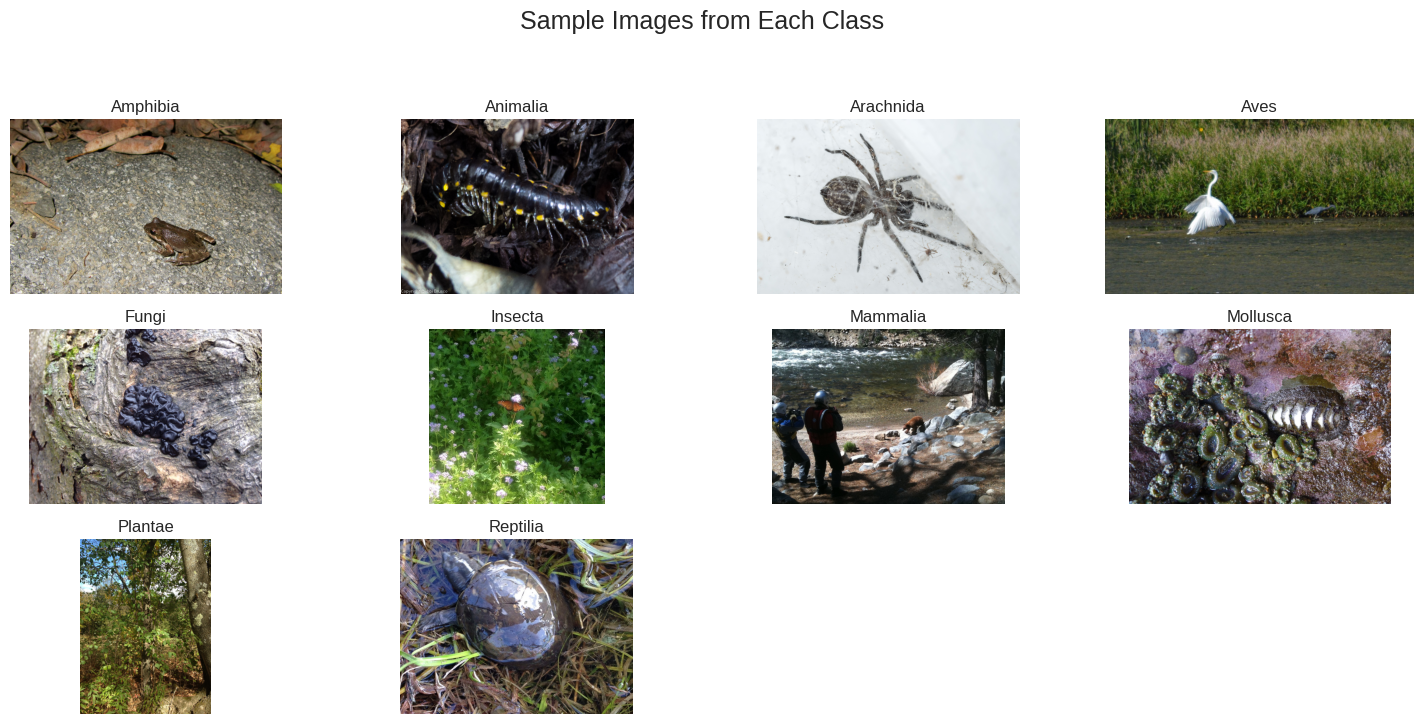

In [6]:
# Display sample images from each class
plt.figure(figsize=(15, 12))

for i, class_name in enumerate(class_names):
    # Get a list of all image files in the class folder
    class_folder = os.path.join(DATA_DIR, class_name)
    image_files = os.listdir(class_folder)
    
    # Randomly select one image file
    random_image_file = random.choice(image_files)
    image_path = os.path.join(class_folder, random_image_file)
    
    # Open and display the image
    img = Image.open(image_path)
    
    # Add to our plot
    plt.subplot(5, 4, i + 1) # Adjust grid size (e.g., 5 rows, 4 columns for 10 classes) if needed
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.suptitle('Sample Images from Each Class', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()